In [100]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as  sns 

from sklearn.preprocessing import StandardScaler
plt.rcParams['figure.figsize']=[15,7]

In [101]:
#import data test and train
train=pd.read_csv("~/Downloads/train.csv")
test=pd.read_csv("~/Downloads/test.csv")

In [102]:
#Concatenate the data
combined=pd.concat([train,test],ignore_index=False,sort=False)

In [103]:
train.shape,test.shape,combined.shape

((891, 12), (418, 11), (1309, 12))

In [104]:
combined.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

## Univariate Analysis

In [105]:
combined.select_dtypes(include=np.number).columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [106]:
combined.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

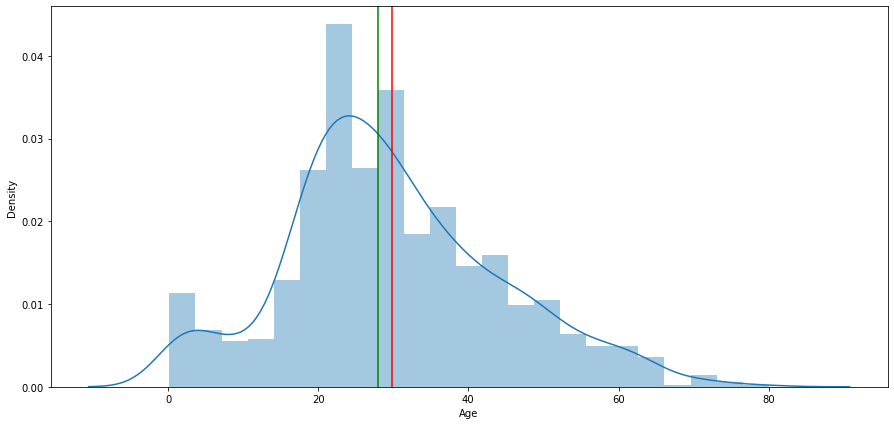

In [107]:
#plot age and fair as both are numeric values
sns.distplot(combined.Age.dropna())


#Age 

plt.axvline(combined.Age.mean(),color='red')
#plt.axvline(combined.Fare.mode()) no mode here
plt.axvline(combined.Age.median(),color='green')



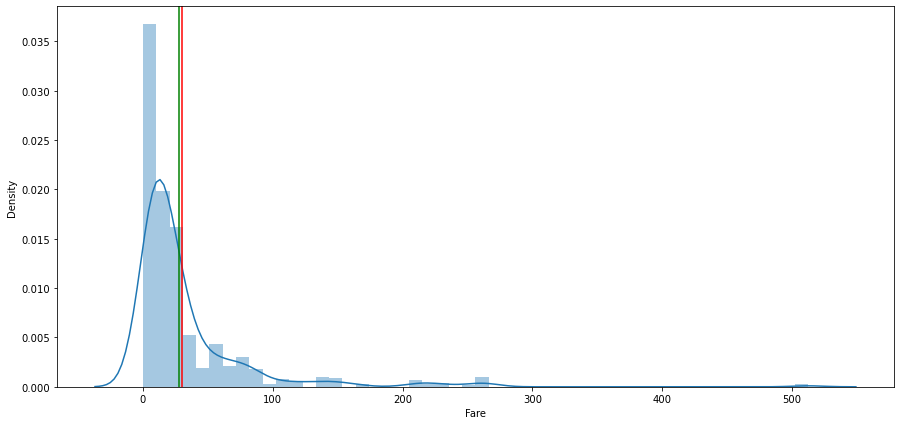

In [108]:
#Fare
sns.distplot(combined.Fare.dropna())
plt.axvline(combined.Age.mean(),color='red')
plt.axvline(combined.Age.median(),color='green')
#plt.axvline(combined.Age.mean(),color='red')

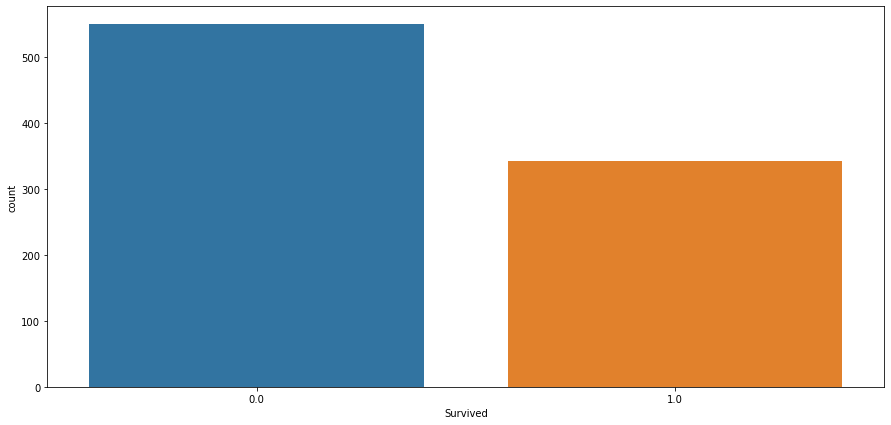

In [109]:
#Categorical variable -TGT

sns.countplot(combined.Survived)
plt.show()

In [110]:
#count of Pclass
combined.Pclass.value_counts() 
#since we know that there were a lot of passenger in class 3 so there is high possibility that the max
#people who died came from class 3

3    709
1    323
2    277
Name: Pclass, dtype: int64

<AxesSubplot:>

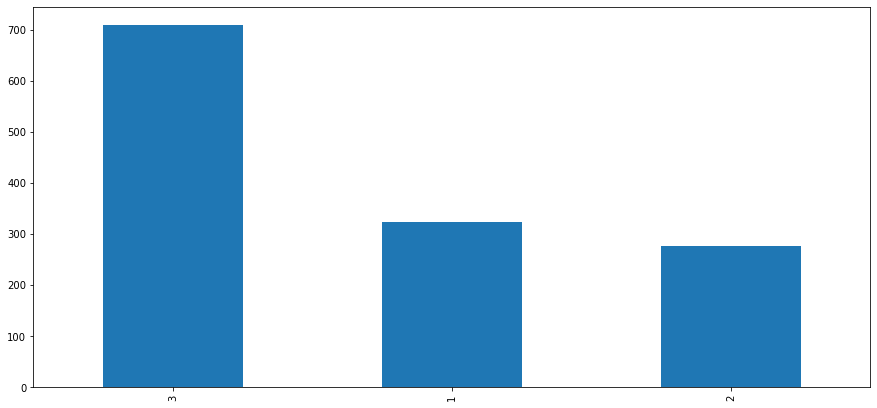

In [111]:
combined.Pclass.value_counts().plot(kind='bar')

<AxesSubplot:>

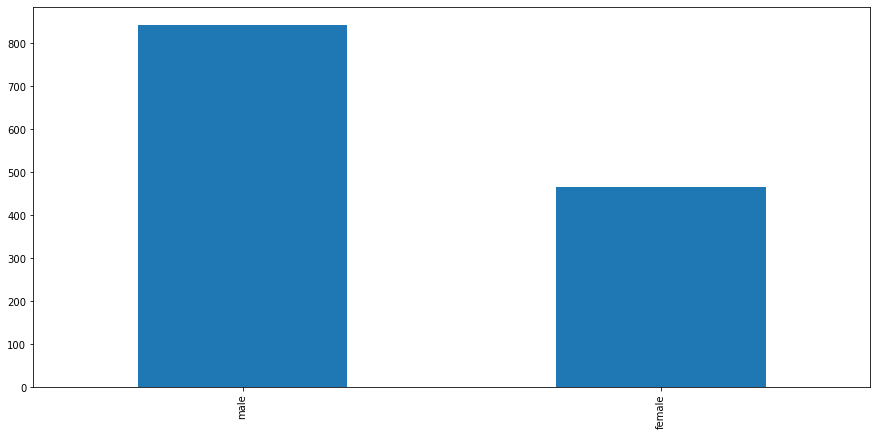

In [112]:
#count of gender
combined.Sex.value_counts().plot(kind='bar')

#More males on the board of titanic..

<AxesSubplot:>

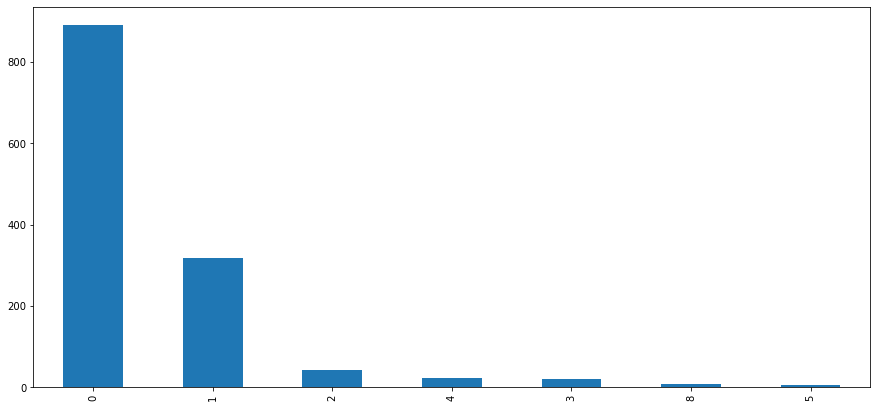

In [113]:
#count of siblings and spouse i.e. sibsp
combined.SibSp.value_counts().plot(kind='bar')

# Here we see a peak on 0 because most people are travelling alone 
# so 0 repersents there is minimum one passenger


<AxesSubplot:>

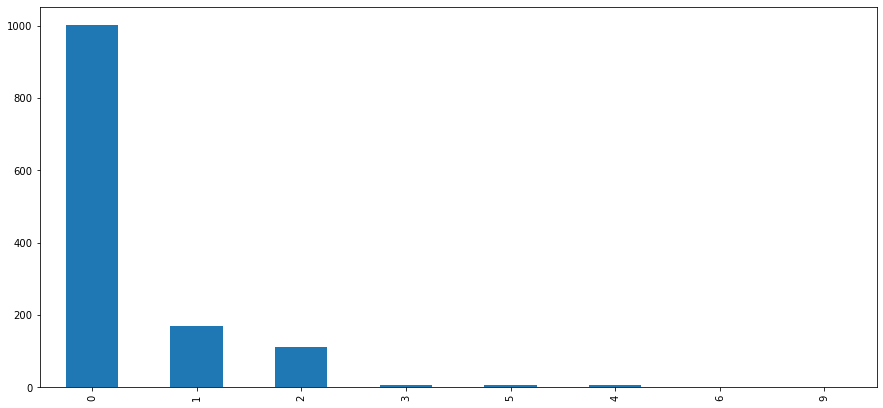

In [114]:
combined.Parch.value_counts().plot(kind='bar')

In [115]:
#combined.Ticket.value_counts()



In [116]:
len(combined.Cabin.unique())

187

<AxesSubplot:>

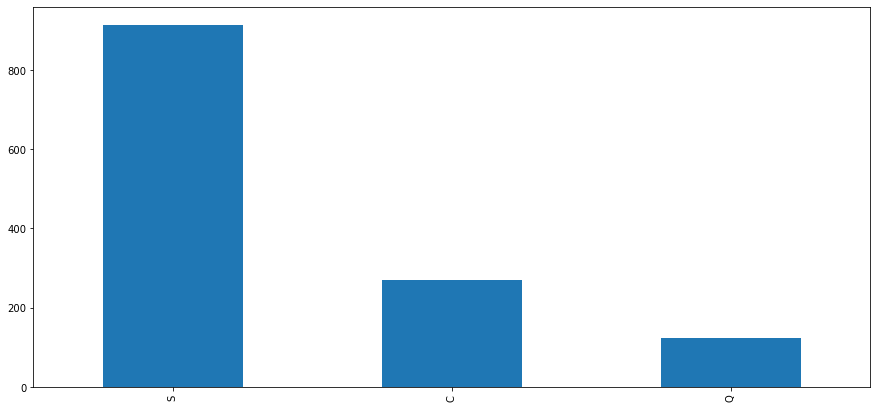

In [117]:
#Embarked

combined.Embarked.value_counts().plot(kind='bar')

# So lot of people boarded the ship from Southampton

## Bivariate Analysis

In [118]:
combined.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<AxesSubplot:xlabel='Survived', ylabel='Age'>

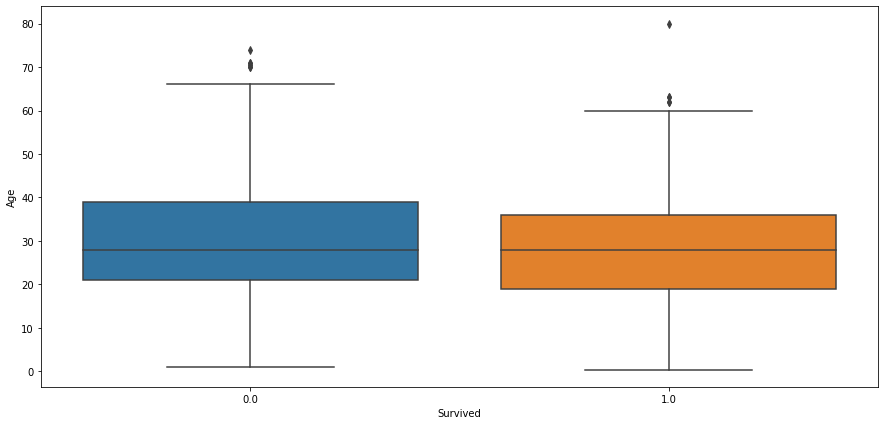

In [119]:
# Age vs Survived
sns.boxplot(data=combined,x='Survived',y='Age')

#People who did not survive have aa higher range of Age values.
#We also notice that a passenger with age of 80 Survived

In [120]:
# Find the Statistical Summary
combined.groupby('Survived')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0.0,424.0,30.626179,14.172110,1.00,21.0,28.0,39.0,74.0
1.0,290.0,28.343690,14.950952,0.42,19.0,28.0,36.0,80.0


In [121]:
#Fare vs Survive
combined.groupby('Survived')['Fare'].describe()

# People who survived paid more fee and zero in min is for crew maybe

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0.0,549.0,22.117887,31.388207,0.0,7.8542,10.5,26.0,263.0000
1.0,342.0,48.395408,66.596998,0.0,12.4750,26.0,57.0,512.3292


In [122]:
# Cat vs Cat
#Survived vs Pclass
tb1=pd.crosstab(combined.Pclass,combined.Survived)
tb1

Survived,0.0,1.0
Pclass,,
1,80,136
2,97,87
3,372,119


<AxesSubplot:xlabel='Pclass'>

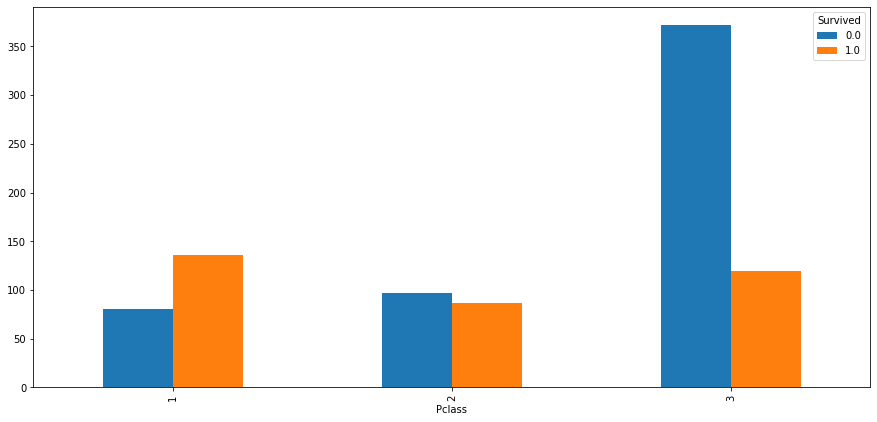

In [123]:
tb1.plot(kind='bar')
#Most of the prople who died are from class three

In [124]:
#Gender vs Survive
tb2=pd.crosstab(combined.Sex,combined.Survived)
#crosstab is used ton give count of categorical variable
tb2

Survived,0.0,1.0
Sex,,
female,81,233
male,468,109


<AxesSubplot:xlabel='Sex'>

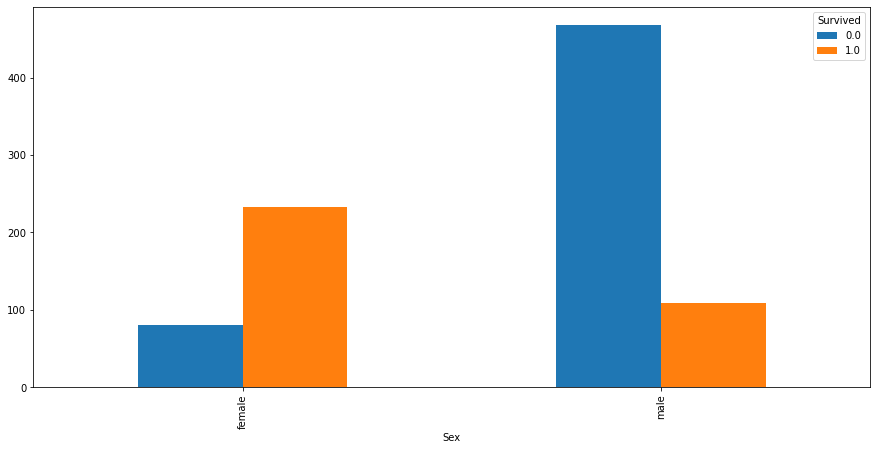

In [125]:
tb2.plot(kind='bar')

In [126]:
#Create a new feature called family because above we cant understand easily
combined['Family']=combined.SibSp+combined.Parch+1

In [127]:
# Cat vs Cat
#Survived vs Pclass
tb1=pd.crosstab(combined.Family,combined.Survived)
tb1

Survived,0.0,1.0
Family,,
1,374,163
2,72,89
3,43,59
4,8,21
5,12,3
6,19,3
7,8,4
8,6,0
11,7,0


<AxesSubplot:xlabel='Family'>

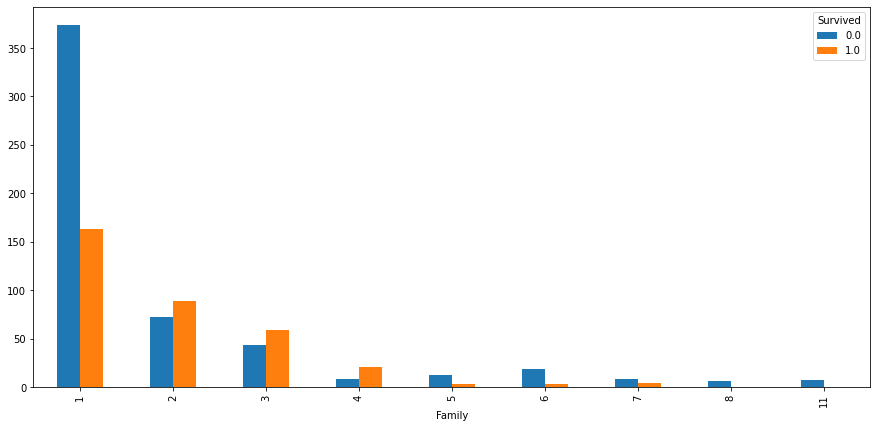

In [128]:
tb1.plot(kind='bar')

#Larger family have low chance of survival

In [129]:
## Cat vs Cat
tb1=pd.crosstab(combined.Embarked,combined.Survived)
tb1

Survived,0.0,1.0
Embarked,,
C,75,93
Q,47,30
S,427,217


<AxesSubplot:xlabel='Embarked'>

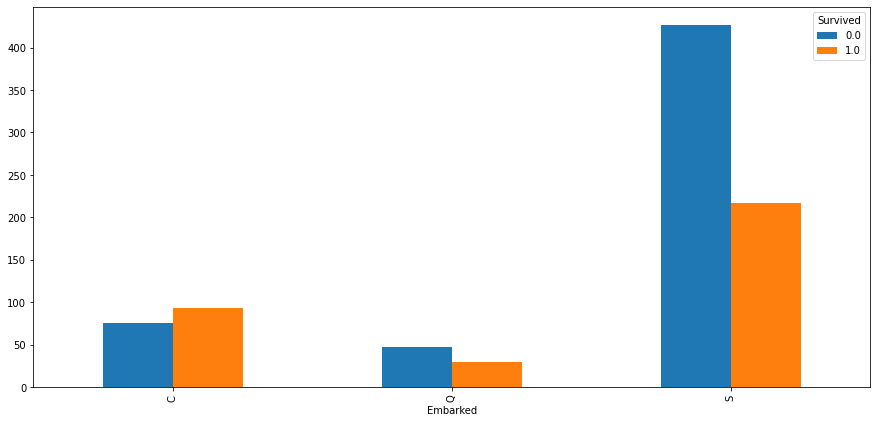

In [130]:
tb1.plot(kind='bar')



In [131]:
#in cabin category we dont see any pattern so will not consider that one

In [132]:
#INFERENCE 
# People from Southampton and Cherbpirg have better chance of Survival
#Passenger from class 1 have a better survival possibility
#people survived have paid more fare than rest
#Most of casualities belonged to male passengers
# larger families have a lower survival ratio
# Older people have a lesser chance of survival


## Feature Engineering


In [133]:
# Cabin
cabins=combined.Cabin.unique()

In [134]:
cabins=['C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64', 'E24', 'C90', 'C45', 'E8', 'B101', 'D45', 'C46', 'D30',
       'E121', 'D11', 'E77', 'F38', 'B3', 'D6', 'B82 B84', 'D17', 'A36',
       'B102', 'B69', 'E49', 'C47', 'D28', 'E17', 'A24', 'C50', 'B42',
       'C148', 'B45', 'B36', 'A21', 'D34', 'A9', 'C31', 'B61', 'C53',
       'D43', 'C130', 'C132', 'C55 C57', 'C116', 'F', 'A29', 'C6', 'C28',
       'C51', 'C97', 'D22', 'B10', 'E45', 'E52', 'A11', 'B11', 'C80',
       'C89', 'F E46', 'B26', 'F E57', 'A18', 'E60', 'E39 E41',
       'B52 B54 B56', 'C39', 'B24', 'D40', 'D38', 'C105']

In [135]:
# Function
def cabincount(x):
    if x in cabins:
        return ("Cabin Alloted")
    else:
        return ("Cabin Missing")

In [136]:
combined['Cabin_count']=combined.Cabin.apply(cabincount)

In [137]:
pd.crosstab(combined.Cabin_count,combined.Survived)

Survived,0.0,1.0
Cabin_count,,
Cabin Alloted,68,136
Cabin Missing,481,206


In [138]:
#Name 
names=combined.Name.transform(lambda x:x.split(', ')[1])
#Extracting the title
names.transform(lambda x:x.split('. ')[0])

0          Mr
1         Mrs
2        Miss
3         Mrs
4          Mr
        ...  
413        Mr
414      Dona
415        Mr
416        Mr
417    Master
Name: Name, Length: 1309, dtype: object

In [139]:
combined['titles'] = pd.Series(names.apply(lambda x:x.split('. ')[0]))

In [140]:
combined.titles.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [147]:
title_ignore=['Don', 'Rev', 'Dr', 'Mme',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer', 'Dona']

In [148]:
def titles(x):
    if x in title_ignore:
        return ('Others')
    else:
        return (x)

In [149]:
combined['titles'] = combined.titles.apply(titles)

In [150]:
combined.titles.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Others', 'Ms'], dtype=object)

In [151]:
#missing values of age will be replace using infer from gender
combined.Age.median()
combined.groupby('titles')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
titles,,,,,,,,
Master,53.0,5.482642,4.161554,0.33,2.0,4.0,9.0,14.5
Miss,210.0,21.774238,12.249077,0.17,15.0,22.0,30.0,63.0
Mr,581.0,32.252151,12.422089,11.00,23.0,29.0,39.0,80.0
Mrs,170.0,36.994118,12.901767,14.00,27.0,35.5,46.5,76.0
Ms,1.0,28.000000,NaN,28.00,28.0,28.0,28.0,28.0
Others,31.0,43.129032,12.309189,23.00,32.5,45.0,52.5,70.0


In [154]:
#Age
combined.loc[(combined.titles=='Master') & (combined.Age.isnull()), 'Age']=4.0
combined.loc[(combined.titles=='Miss') & (combined.Age.isnull()), 'Age']=22.0
combined.loc[(combined.titles=='Mr') & (combined.Age.isnull()), 'Age']=29.0
combined.loc[(combined.titles=='Mrs') & (combined.Age.isnull()), 'Age']=35.5
combined.loc[(combined.titles=='Ms') & (combined.Age.isnull()), 'Age']=28.0
combined.loc[(combined.titles=='Others') & (combined.Age.isnull()), 'Age']=45.0

In [161]:
#Fare and Embarked
combined.Embarked.fillna(combined.Embarked.mode()[0],inplace=True)
combined.Fare.fillna(combined.Fare.mode()[0],inplace=True)

In [166]:
# drop the unnecessary variable
new=combined.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin'],axis=1)
new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     891 non-null    float64
 1   Pclass       1309 non-null   int64  
 2   Sex          1309 non-null   object 
 3   Age          1309 non-null   float64
 4   Fare         1309 non-null   float64
 5   Embarked     1309 non-null   object 
 6   Family       1309 non-null   int64  
 7   Cabin_count  1309 non-null   object 
 8   titles       1309 non-null   object 
dtypes: float64(3), int64(2), object(4)
memory usage: 134.6+ KB


In [168]:
 train.shape

(891, 12)

In [169]:
combined.shape

(1309, 15)

In [ ]:
new.iloc[0:train.shape[0]-1,:].tail()
#new.iloc[0:891,:]

In [176]:
newtrain=new.iloc[0:train.shape[0],:]

In [177]:
newtest=new.iloc[train.shape[0]:]

In [178]:
newtrain.shape,newtest.shape

((891, 9), (418, 9))

In [185]:
newtrain

,Survived,Pclass,Sex,Age,Fare,Embarked,Family,Cabin_count,titles
0,0.0,3,male,22.0,7.2500,S,2,Cabin Missing,Mr
1,1.0,1,female,38.0,71.2833,C,2,Cabin Alloted,Mrs
2,1.0,3,female,26.0,7.9250,S,1,Cabin Missing,Miss
3,1.0,1,female,35.0,53.1000,S,2,Cabin Alloted,Mrs
4,0.0,3,male,35.0,8.0500,S,1,Cabin Missing,Mr
...,...,...,...,...,...,...,...,...,...
886,0.0,2,male,27.0,13.0000,S,1,Cabin Missing,Others
887,1.0,1,female,19.0,30.0000,S,1,Cabin Alloted,Miss
888,0.0,3,female,22.0,23.4500,S,4,Cabin Missing,Miss
889,1.0,1,male,26.0,30.0000,C,1,Cabin Alloted,Mr


In [188]:
#drop target variable
newtest=newtest.drop('Survived',axis=1)

In [189]:
newtrain.shape,newtest.shape

((891, 9), (418, 8))

In [190]:
#Scaling
sc=StandardScaler()  #fit will store the mean and std of data

In [191]:
df=pd.DataFrame(sc.fit_transform(newtrain.loc[:,['Age','Fare']]),columns=['Age_Scaled','Fare_Scaled'])

In [192]:
newtrain['Age']=df['Age_Scaled']
newtrain['Fare']=df['Fare_Scaled']

In [193]:
newtrain

,Survived,Pclass,Sex,Age,Fare,Embarked,Family,Cabin_count,titles
0,0.0,3,male,-0.552307,-0.502445,S,2,Cabin Missing,Mr
1,1.0,1,female,0.657044,0.786845,C,2,Cabin Alloted,Mrs
2,1.0,3,female,-0.249969,-0.488854,S,1,Cabin Missing,Miss
3,1.0,1,female,0.430291,0.420730,S,2,Cabin Alloted,Mrs
4,0.0,3,male,0.430291,-0.486337,S,1,Cabin Missing,Mr
...,...,...,...,...,...,...,...,...,...
886,0.0,2,male,-0.174385,-0.386671,S,1,Cabin Missing,Others
887,1.0,1,female,-0.779060,-0.044381,S,1,Cabin Alloted,Miss
888,0.0,3,female,-0.552307,-0.176263,S,4,Cabin Missing,Miss
889,1.0,1,male,-0.249969,-0.044381,C,1,Cabin Alloted,Mr


In [194]:
#scale the age and fare in test
testdf=pd.DataFrame(sc.transform(newtest.loc[:,['Age','Fare']]),
                   columns=['Age_Scaled','Fare_Scaled'])

In [195]:
newtest['Age']=testdf['Age_Scaled']
newtest['Fare']=testdf['Fare_Scaled']

In [196]:
newtest.head()

,Pclass,Sex,Age,Fare,Embarked,Family,Cabin_count,titles
0,3,male,0.392499,-0.490783,Q,1,Cabin Missing,Mr
1,3,female,1.337305,-0.507479,S,2,Cabin Missing,Mrs
2,2,male,2.471071,-0.453367,Q,1,Cabin Missing,Mr
3,3,male,-0.174385,-0.474005,S,1,Cabin Missing,Mr
4,3,female,-0.552307,-0.401017,S,3,Cabin Missing,Mrs


In [198]:
#Dummy Train and Dummytest

dummytrain=pd.get_dummies(newtrain,drop_first=True)
dummytest=pd.get_dummies(newtest,drop_first=True)


In [199]:
dummytrain.shape,dummytest.shape

((891, 14), (418, 13))

In [200]:
dummytrain.head()

,Survived,Pclass,Age,Fare,Family,Sex_male,Embarked_Q,Embarked_S,Cabin_count_Cabin Missing,titles_Miss,titles_Mr,titles_Mrs,titles_Ms,titles_Others
0,0.0,3,-0.552307,-0.502445,2,1,0,1,1,0,1,0,0,0
1,1.0,1,0.657044,0.786845,2,0,0,0,0,0,0,1,0,0
2,1.0,3,-0.249969,-0.488854,1,0,0,1,1,1,0,0,0,0
3,1.0,1,0.430291,0.420730,2,0,0,1,0,0,0,1,0,0
4,0.0,3,0.430291,-0.486337,1,1,0,1,1,0,1,0,0,0


In [3]:
# we can drop product id also we dont get much inference
